In [188]:
import torch
from torch import nn

# Define my own Neural Network with class
class MyNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(2, 8),
      nn.ReLU(),
      nn.Linear(8, 1)
    )

  def forward(self, x):
    x = self.linear_relu_stack(x)
    return x

In [219]:
# Test
# Give x and y
x = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

# Convert to tensor
x = torch.tensor(x).float()
y = torch.tensor(y).float()

device = "cpu"

if torch.cuda.is_available():
  device = "cuda"

# Set GPU Computing
x, y = x.to(device), y.to(device)

# Create model
model = MyNeuralNetwork().to(device)

for i in model.parameters():
  print(i)

Parameter containing:
tensor([[ 0.1015,  0.0709],
        [-0.6146,  0.5758],
        [ 0.4272, -0.0252],
        [ 0.6005, -0.1176],
        [-0.1079,  0.5578],
        [-0.3760,  0.6383],
        [-0.4244, -0.3296],
        [ 0.4478, -0.2411]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.5254,  0.1646,  0.0558,  0.4129, -0.3419, -0.3396, -0.1290, -0.4516],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.0695,  0.2408, -0.1518,  0.3340,  0.3150, -0.1092, -0.3470,  0.0606]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.1252], device='cuda:0', requires_grad=True)


In [ ]:
from torchsummary import summary

summary(model, input_size = (1, 2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                    [-1, 2]               0
            Linear-2                    [-1, 8]              24
              ReLU-3                    [-1, 8]               0
            Linear-4                    [-1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [190]:
# Let define some functions
from torch.optim import SGD

def getDataLoader(x, y, batch_size = 1):
  # Init entire data
  dataset = MyDataset(x, y)

  # Mix data and divide by batch size = 2
  dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

  return dataloader

# Define a DataSet Printer
def printData(x, y, batch_size = 1):
  # Get dataloader
  dataloader = getDataLoader(x, y, batch_size)
  for x, y in dataloader:
    print(x, y)

def train(x, y, model, lnr, loss_function, times = 50):
  loss_list = []
  opt = SGD(model.parameters(), lr = lnr)
  dataloader = getDataLoader(x, y, 2)

  # Train the model with {times} epochs (50 iteration times)
  for epoch in range(times):
    # Delete the accumulated gradient of previous
    opt.zero_grad()
    loss = loss_function(model(x), y)
    loss.backward()
    # Update weights
    opt.step()
    loss_list.append(loss.item())

  return loss_list

def lossesChart(plt, loss_list):
  plt.plot(loss_list)
  plt.title("Lost variation over increasing epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Loss values")
  plt.show()


In [191]:
# With Dataset, DataLoader and batch size
from torch.utils.data import Dataset, DataLoader

# Define my own Dataset
class MyDataset(Dataset):
  def __init__(self, x, y):
    super().__init__()
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.x)

  def __getitem__(self, row_index):
    return self.x[row_index], self.y[row_index]

# Print data
printData(x, y)

tensor([[3., 4.]], device='cuda:0') tensor([[7.]], device='cuda:0')
tensor([[1., 2.]], device='cuda:0') tensor([[3.]], device='cuda:0')
tensor([[5., 6.]], device='cuda:0') tensor([[11.]], device='cuda:0')
tensor([[7., 8.]], device='cuda:0') tensor([[15.]], device='cuda:0')


Y hat:  tensor([[ 2.2270],
        [ 6.2114],
        [10.2455],
        [14.2862]], device='cuda:0', grad_fn=<AddmmBackward0>)
Loss:  tensor(0.5745, device='cuda:0', grad_fn=<MseLossBackward0>)


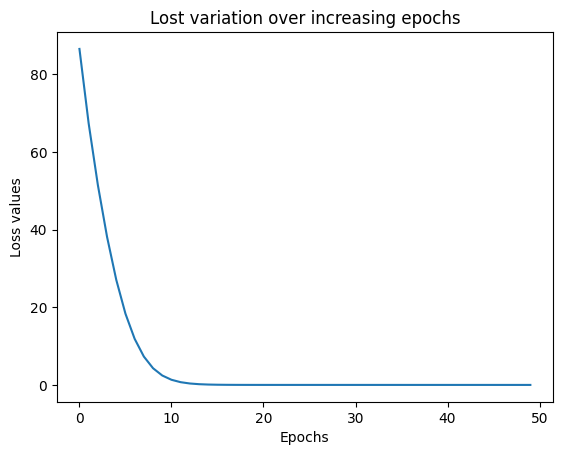

In [269]:
# Train MyNeuralNetwork
import matplotlib.pyplot as plt

x = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

# Convert to tensor
x = torch.tensor(x).float()
y = torch.tensor(y).float()

# Set GPU Computing
x, y = x.to(device), y.to(device)

# Tracking losses
# Get MSE Computing from torch.nn
loss_function = nn.MSELoss()

# Computing y hat
y_hat = model(x)

print("Y hat: ", y_hat)

# Computing loss
loss = loss_function(y_hat, y)

print("Loss: ", loss)

# Optimize with SGD Algorithm with learning rate is 0.001
learning_rate = 0.001

# Create model
model = MyNeuralNetwork().to(device)

# Train
loss_list = train(x, y, model, learning_rate, loss_function)

# Draw a chart about losses change in each epoch
lossesChart(plt, loss_list)

In [262]:
import torch
from torch import nn

# Exercise 1:
# Define a Neural Network that has 2 hidden layers.
class MyNeuralNetwork2HiddenLayers(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(2, 10),
      nn.ReLU(),
      nn.Linear(10, 10),
      nn.ReLU(),
      nn.Linear(10, 1)
    )

  def forward(self, x):
    x = self.linear_relu_stack(x)
    return x

Y hat:  tensor([[12.3138],
        [30.6827],
        [ 8.4896],
        [14.0306]], device='cuda:0', grad_fn=<AddmmBackward0>)
Loss:  tensor(0.2082, device='cuda:0', grad_fn=<MseLossBackward0>)


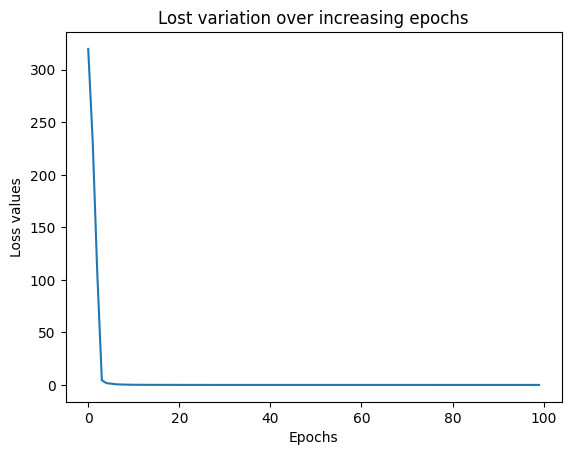

In [270]:
# Train MyNeuralNetwork2HiddenLayers
import matplotlib.pyplot as plt

x = [[10, 3], [11, 20], [8, 1], [5, 9]]
y = [[13], [31], [9], [14]]

# Convert to tensor
x = torch.tensor(x).float()
y = torch.tensor(y).float()

# Set GPU Computing
x, y = x.to(device), y.to(device)

# Tracking losses
# Get MSE Computing from torch.nn
loss_function = nn.MSELoss()

# Computing y hat
y_hat = model(x)

print("Y hat: ", y_hat)

# Computing loss
loss = loss_function(y_hat, y)

print("Loss: ", loss)

# Optimize with SGD Algorithm with learning rate is 0.001
learning_rate = 0.001

# Create model
model2layers = MyNeuralNetwork2HiddenLayers().to(device)

# Train
loss_list = train(x, y, model2layers, learning_rate, loss_function, 100)

# Draw a chart about losses change in each epoch
lossesChart(plt, loss_list)

In [273]:
# Test with another Data
test_x = [[20, 11], [12, 1], [1, 1]]
test_x = torch.tensor(test_x).float().to(device)

# Expect: predictions = [[31], [13]]
predictions = model(test_x)
predictions_2layers = model2layers(test_x)

print("From MyNeuralNetwork: ", predictions)
print("From MyNeuralNetwork2HiddenLayers: ", predictions_2layers)

From MyNeuralNetwork:  tensor([[29.6813],
        [12.0216],
        [ 2.1777]], device='cuda:0', grad_fn=<AddmmBackward0>)
From MyNeuralNetwork2HiddenLayers:  tensor([[29.8512],
        [12.7980],
        [ 2.6876]], device='cuda:0', grad_fn=<AddmmBackward0>)
